In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
import numpy as np
import calendar

In [170]:
data = pd.read_csv(r'C:\retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Descriptive Analytics

1. What is the total sales revenue for the period covered?
2. What is the total units sold for the period covered?
3. What is the average units sold per transaction?

### Exploratory Data Analysis

1. How do sales revenues vary across different time periods?
2. How does purchasing patterns of customers differ by age and gender? 

### Business Insights

1. What is the most revenue-generating day of the week accross different product categories?
2. What is the most revenue-generating month of the year?
3. Which product category does sell more across different customer segments?

#### Recommendations

1. Based on the data, what would you recommend to increase sales revenue for the product?

### Functions

In [299]:
# move a column in a table
def insert_column(df: pd.DataFrame, col_name: str, loc_index: int): 
    column = df.pop(col_name)
    df.insert(loc_index, col_name, column)

# show data labels on bar and column charts
def show_dataLabel(ax: matplotlib.axes._axes.Axes, column_chart_check: bool):
    #.patches is everything inside of chart
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height if column_chart_check else width:,.0f}'  # f'{height:.2f}' to format decimal values
        
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=6, color='white', fontweight='bold')



### Cleaning and Transforming Data


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
# checking if there is empty cells
data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [172]:
# delete Unncsessary Columns
try:
    data = data.drop(columns=['Customer ID', 'Transaction ID'])
except:
    print("Specified Columns were not found or are already deleted")
    
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [174]:
# Add a Month Column
data['Month'] = pd.to_datetime(data['Date']).dt.month.apply(lambda x: calendar.month_abbr[x])

# Change the Month Column to categorical to save memory and support logical ordering 
data['Month'] = pd.Categorical(data['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Insert the month column next to the date column
insert_column(data, "Month", 1)

data.head()

,Date,Month,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Nov,Male,34,Beauty,3,50,150
1,2023-02-27,Feb,Female,26,Clothing,2,500,1000
2,2023-01-13,Jan,Male,50,Electronics,1,30,30
3,2023-05-21,May,Male,37,Clothing,1,500,500
4,2023-05-06,May,Male,30,Beauty,2,50,100


In [176]:
# Add a Quarter Column
# Map the Quarter_col to the correct Abbreviation and convert to categorical data
data['Quarter'] = data['Month'].map({
    'Jan': 'Q1',
    'Feb': 'Q1',
    'Mar': 'Q1',
    'Apr': 'Q2',
    'May': 'Q2',
    'Jun': 'Q2',
    'Jul': 'Q3',
    'Aug': 'Q3',
    'Sep': 'Q3',
    'Oct': 'Q4',
    'Nov': 'Q4',
    'Dec': 'Q4',
})
data['Quarter'] = pd.Categorical(data['Quarter'], ['Q1', 'Q2', 'Q3', 'Q4'])

# Insert the day of the Quarter column next to the month column
insert_column(data, "Quarter", 2)

data

,Date,Month,Quarter,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Nov,Q4,Male,34,Beauty,3,50,150
1,2023-02-27,Feb,Q1,Female,26,Clothing,2,500,1000
2,2023-01-13,Jan,Q1,Male,50,Electronics,1,30,30
3,2023-05-21,May,Q2,Male,37,Clothing,1,500,500
4,2023-05-06,May,Q2,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,2023-05-16,May,Q2,Male,62,Clothing,1,50,50
996,2023-11-17,Nov,Q4,Male,52,Beauty,3,30,90
997,2023-10-29,Oct,Q4,Female,23,Beauty,4,25,100
998,2023-12-05,Dec,Q4,Female,36,Electronics,3,50,150


In [178]:
# Add day of the Week Column 
data['Day of Week'] = pd.to_datetime(data['Date']).dt.dayofweek

# Map the day_number to the correct Abbreviation and convert to categorical data
data['Day of Week'] = data['Day of Week'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})
data['Day of Week'] = pd.Categorical(data['Day of Week'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Insert the day of the week column next to the Quarter column
insert_column(data, "Day of Week", 3)

data.head()

,Date,Month,Quarter,Day of Week,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Nov,Q4,Fri,Male,34,Beauty,3,50,150
1,2023-02-27,Feb,Q1,Mon,Female,26,Clothing,2,500,1000
2,2023-01-13,Jan,Q1,Fri,Male,50,Electronics,1,30,30
3,2023-05-21,May,Q2,Sun,Male,37,Clothing,1,500,500
4,2023-05-06,May,Q2,Sat,Male,30,Beauty,2,50,100


In [180]:
# Add Age Group Column
data['Age Group'] = pd.cut(
    data['Age'],
    bins=[18, 26, 35, 45, 55, np.inf],
    labels=["18-26", "27-35", "36-45", "46-55", "56+"],
)

# Insert the age group column next to the age column
insert_column(data, "Age Group", 6)

data

,Date,Month,Quarter,Day of Week,Gender,Age,Age Group,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Nov,Q4,Fri,Male,34,27-35,Beauty,3,50,150
1,2023-02-27,Feb,Q1,Mon,Female,26,18-26,Clothing,2,500,1000
2,2023-01-13,Jan,Q1,Fri,Male,50,46-55,Electronics,1,30,30
3,2023-05-21,May,Q2,Sun,Male,37,36-45,Clothing,1,500,500
4,2023-05-06,May,Q2,Sat,Male,30,27-35,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,May,Q2,Tue,Male,62,56+,Clothing,1,50,50
996,2023-11-17,Nov,Q4,Fri,Male,52,46-55,Beauty,3,30,90
997,2023-10-29,Oct,Q4,Sun,Female,23,18-26,Beauty,4,25,100
998,2023-12-05,Dec,Q4,Tue,Female,36,36-45,Electronics,3,50,150


In [182]:
# Sort the Values by Date
data = data.sort_values('Date')
data

,Date,Month,Quarter,Day of Week,Gender,Age,Age Group,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Jan,Q1,Sun,Male,46,46-55,Beauty,3,500,1500
179,2023-01-01,Jan,Q1,Sun,Male,41,36-45,Clothing,3,300,900
558,2023-01-01,Jan,Q1,Sun,Female,40,36-45,Clothing,4,300,1200
302,2023-01-02,Jan,Q1,Mon,Male,19,18-26,Electronics,3,30,90
978,2023-01-02,Jan,Q1,Mon,Female,19,18-26,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...,...,...
232,2023-12-29,Dec,Q4,Fri,Female,51,46-55,Beauty,2,300,600
804,2023-12-29,Dec,Q4,Fri,Female,30,27-35,Beauty,3,500,1500
856,2023-12-31,Dec,Q4,Sun,Male,60,56+,Electronics,2,25,50
210,2024-01-01,Jan,Q1,Mon,Male,42,36-45,Beauty,3,500,1500



### Descriptive Statistics


In [186]:
data.describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [188]:
# Extract the starting and ending dates from the data
start_date = data['Date'].min()
end_date = data['Date'].max()

# Print the results
print(f'Start Date: {start_date}')
print(f'End Date: {end_date}')

Start Date: 2023-01-01
End Date: 2024-01-01


In [301]:
total_revenue = data['Total Amount'].sum()
revenue_str = '${:,.2f}'.format(total_revenue)
print('The total revenue is', revenue_str)

total_qty_sold = data['Quantity'].sum()
qty_sold_str = '{:,.2f}'.format(total_qty_sold)
print('The total annual quantity sold is', qty_sold_str)

average_units_sold_perDay = data['Quantity'].mean()
qty_sold_perDay = '{:,.2f}'.format(average_units_sold_perDay)
print('The average quantity sold per transaction is', qty_sold_perDay)

The total revenue is $456,000.00
The total annual quantity sold is 2,514.00
The average quantity sold per transaction is 2.51


In [192]:
sales_by_gender = data.groupby('Gender')[['Total Amount', 'Quantity']].sum().sort_values('Total Amount', ascending = False)
sales_by_gender.rename(columns={'Total Amount': 'Total Sales'}, inplace=True)
sales_by_gender["Total Sales"] = sales_by_gender["Total Sales"].map("{:,.0f}".format)
sales_by_gender["Quantity"] = sales_by_gender["Quantity"].map("{:,.0f}".format)
display(sales_by_gender)

,Total Sales,Quantity
Gender,,
Female,"232,840","1,298"
Male,"223,160","1,216"


In [194]:
sales_by_gender = data.groupby('Gender')[['Total Amount', 'Quantity']].mean().sort_values('Total Amount', ascending = False)
sales_by_gender.rename(columns={'Total Amount': 'Average Sale per Transaction'}, inplace=True)
sales_by_gender.rename(columns={'Quantity': 'Average Quantity Purchased per Transaction'}, inplace=True)
sales_by_gender["Average Sale per Transaction"] = sales_by_gender["Average Sale per Transaction"].map("{:,.0f}".format)
sales_by_gender["Average Quantity Purchased per Transaction"] = sales_by_gender["Average Quantity Purchased per Transaction"].map("{:,.0f}".format)
display(sales_by_gender)

,Average Sale per Transaction,Average Quantity Purchased per Transaction
Gender,,
Female,457,3
Male,455,2



### Data Visualization


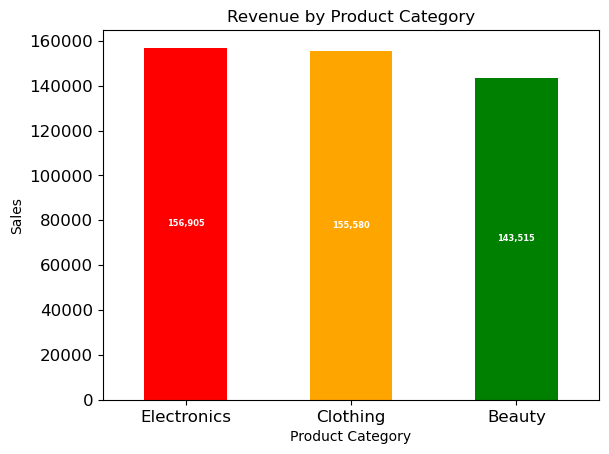

In [303]:
sales_by_product = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending = False)
ax = sales_by_product.plot(kind='bar',  y='Total Amount', color=['red', 'orange', 'green'])
show_dataLabel(ax, True)        
plt.ylabel('Sales')
plt.title('Revenue by Product Category')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, color='black')
plt.show()

The graph shows that electronic products generated the highest sales in year 2023 followed by clothing and beauty products, respectively. Around 34.4% of sale revenues come from electronics products. Clothing products accounted for 34.1% of the total sale revenue, while beauty products contributed the least with 31.5%.

In [198]:
sales_by_product_gender = data.groupby(['Gender', 'Product Category'])[['Total Amount']].sum()
sales_by_product_gender = sales_by_product_gender.sort_values(['Gender','Total Amount'], ascending = [True, False])
sales_by_product_gender

Total Amount
Gender Product Category              
Female Clothing                 81275
       Electronics              76735
       Beauty                   74830
Male   Electronics              80170
       Clothing                 74305
       Beauty                   68685

Female generally spend more on clothing products while male customers spend more on electronics. Females generally spend more than males accross all the product categories except for electronics and the sum of female customers purchases account for 51% of the total sale revenue. 

Text(0.5, 1.0, 'Revenue by Product Category by Gender')

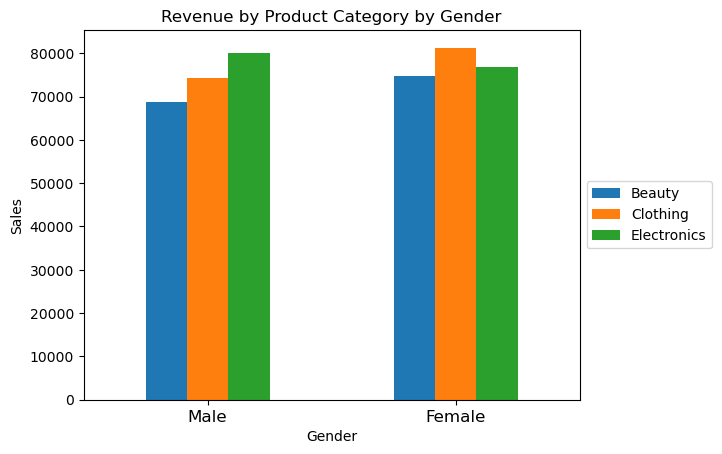

In [260]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Day of Week', 'Age Group', 'Month', 'Quarter', 'Price per Unit'])
df1 = df.pivot_table(index='Gender', columns='Product Category', aggfunc='sum')
df1.sort_values(by='Gender', ascending=False).plot(kind='bar', y='Total Amount')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Sales')
plt.xticks(fontsize=12, rotation=0)
plt.title('Revenue by Product Category by Gender')

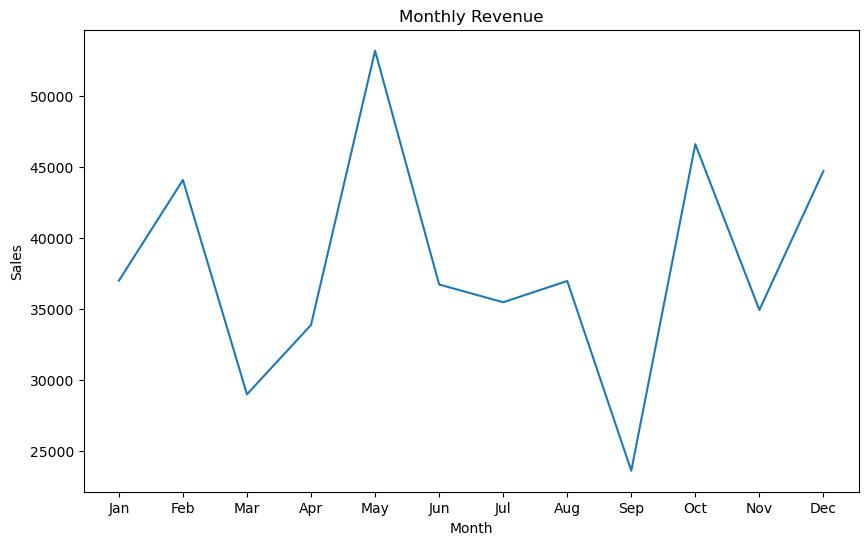

In [214]:
sales_by_month = data.groupby('Month', observed = True)['Total Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

Sale revenue is flactuating, however we can see that in May the highest sale revenue was recorded, meanwhile the lowest sale revenue was recorded for the month of Septmeber. We observe that in Feburaury and October comprable high sale revenue is generated. Slow sale transactions is observed in March. 

Text(0.5, 1.0, 'Monthly Sale Revenue by Male and Female customers')

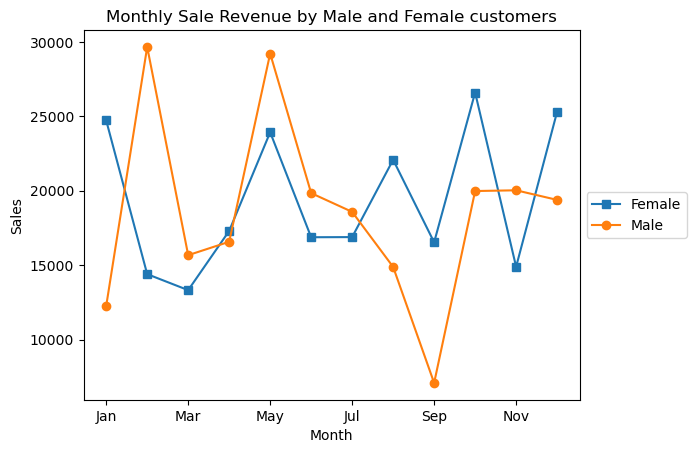

In [216]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Day of Week', 'Age Group', 'Product Category', 'Quarter', 'Price per Unit'])
df1 = df.pivot_table(index='Month', columns='Gender', aggfunc='sum', observed=True)
df1.sort_values(by='Month', ascending=True).plot(kind='line', y='Total Amount', style=['s-','o-'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Sales')
plt.title('Monthly Sale Revenue by Male and Female customers')

It appears that female purchases fluactuate less when compared to male purchasing patterns. Revenue generated as result of male purchases is the highest in February and May and is the lowest in the month of September. In contrast, female customers show increasing buying behaviors toward the end of the year (months of Oct and Dec). 

Text(0.5, 1.0, 'Quarterly Sale Revenue by Product Type')

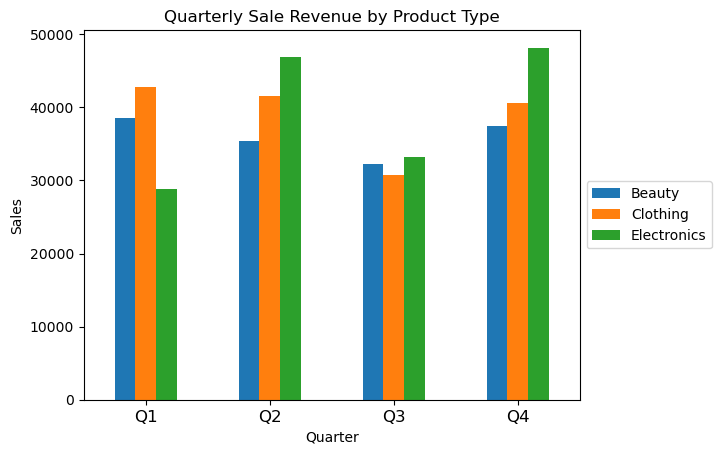

In [256]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Day of Week', 'Age Group', 'Gender', 'Month', 'Price per Unit'])
df1 = df.pivot_table(index='Quarter', columns='Product Category', aggfunc='sum', observed=True)
df1.sort_values(by='Quarter', ascending=True).plot(kind='bar', stacked=False, y='Total Amount')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Sales')
plt.xlabel('Quarter')
plt.xticks(fontsize=12, rotation=0)
plt.title('Quarterly Sale Revenue by Product Type')

Electronic products are purchased more in the second and the fourth quarter. Clothing and beauty products purchases show less variation per quarter when compared to electronics. Generally, the least sale revenue accross all products except for electronics occur in the third quarter. The least total sale revenue is recorded in the third quarter. 

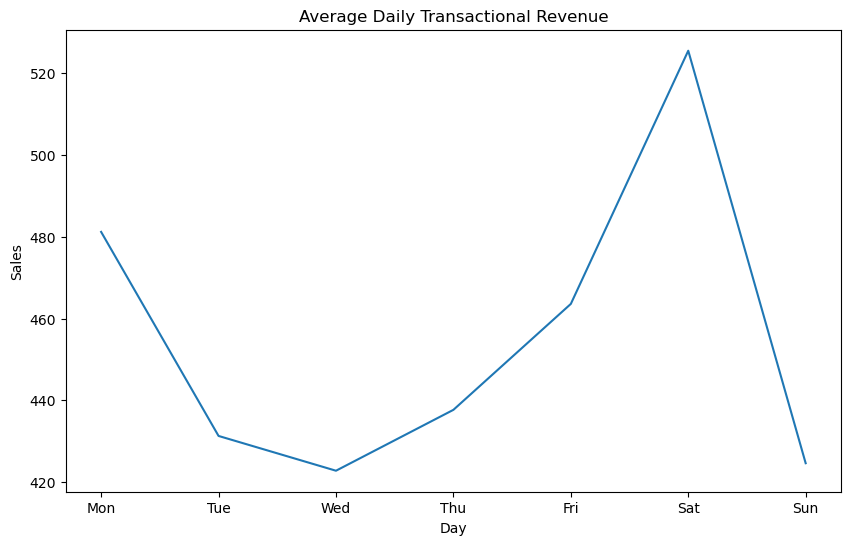

In [311]:
sales_by_month = data.groupby('Day of Week', observed = True)['Total Amount'].mean()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Average Daily Transactional Revenue')
plt.show()

As expected, the highest average sale revenue is recorded during the weekend on Saturday. The sale revenue decreased to a lowest on Sunday and suddenly increases on Monday and steadly decreases to a lowest on Wednesday and then it steadily increases till it reaches its peak maxium on Saturday. In nutshell, sale transactions surge toward the end of the week and in the mid-week and Sunday we observe low sale activities. 

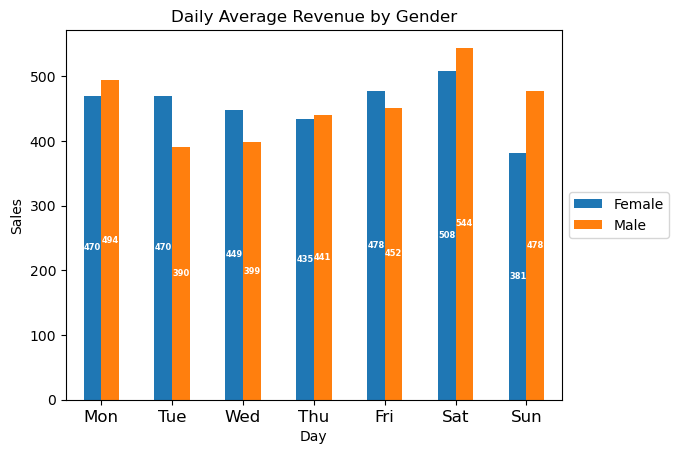

In [264]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Product Category', 'Age Group', 'Quarter', 'Month', 'Price per Unit'])
df1 = df.pivot_table(index='Day of Week', columns='Gender', aggfunc='mean', observed=True)
ax = df1.sort_values(by='Day of Week', ascending=True).plot(kind='bar', stacked=False, y='Total Amount')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Sales')
plt.xlabel('Day')
plt.xticks(fontsize=12, rotation=0)
plt.title('Daily Average Revenue by Gender')
show_dataLabel(ax, True)

Male customers show greater perferences for making purchases during the weekend and on Monday and less perferences for mid-week purchases. In constrast, females purchasing patterns is more stable throuhout the week except for Sunday where we observe sharp drop in sales. 

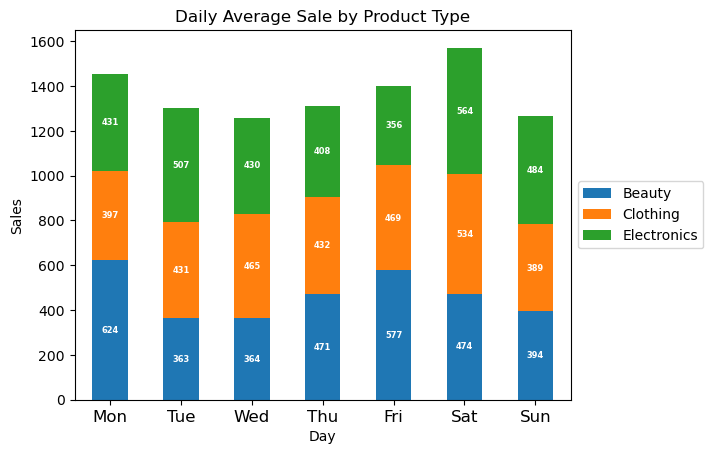

In [226]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Gender', 'Age Group', 'Quarter', 'Month', 'Price per Unit'])
df1 = df.pivot_table(index='Day of Week', columns='Product Category', aggfunc='mean', observed=True)
ax = df1.sort_values(by='Day of Week', ascending=True).plot(kind='bar', stacked=True, y='Total Amount')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Sales')
plt.xlabel('Day')
plt.xticks(fontsize=12, rotation=0)
plt.title('Daily Average Sale by Product Type')
show_dataLabel(ax, True)

Electronics and clothing products generally exhibit similar pattern to the average daily total sale revenue. However, the highest average daily revenue for beauty products was recorded on Monday and followed by Friday. 

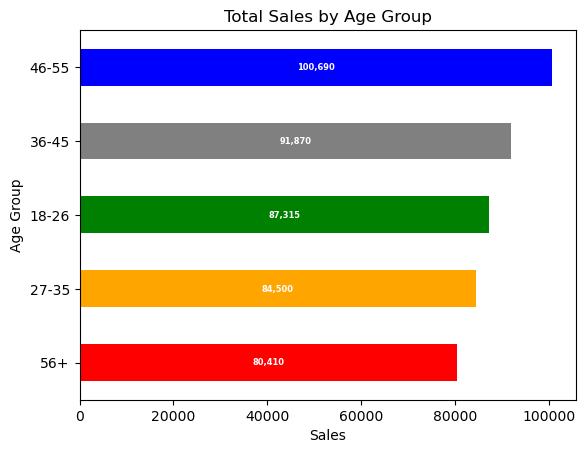

In [228]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Gender', 'Day of Week', 'Quarter', 'Month', 'Product Category', 'Price per Unit'])
df1 = df.pivot_table(index='Age Group', aggfunc='sum', observed=True)
ax = df1.sort_values(by='Total Amount', ascending=True).plot(kind='barh', stacked=False, y='Total Amount', 
                                                             color=('red', 'orange', 'green', 'gray', 'blue'), legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Age Group')
plt.xlabel('Sales')
plt.title('Total Sales by Age Group')
show_dataLabel(ax, False)

The age group of 46-55 contribute the most to the annual sale revenue accorss all age groups. Meanwhile, 56+ age group contribute the least to the annual total sale revenue.

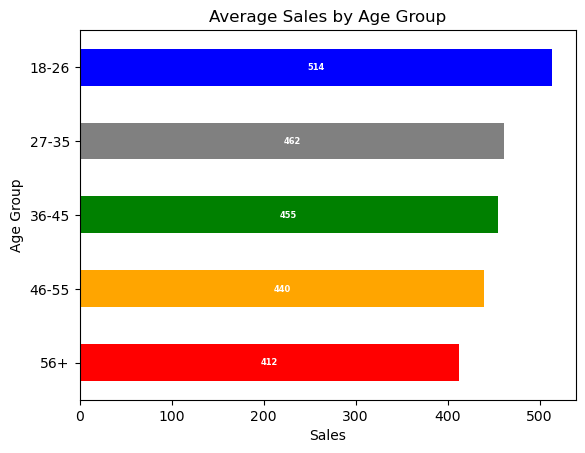

In [245]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Gender', 'Day of Week', 'Quarter', 'Month', 'Product Category'])
df1 = df.pivot_table(index='Age Group', aggfunc='mean', observed=True)
ax = df1.sort_values(by='Age Group', ascending=False).plot(kind='barh', stacked=False, y='Total Amount',  
                                                           color=('red', 'orange', 'green', 'gray', 'blue'), legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Age Group')
plt.xlabel('Sales')
plt.title('Average Sales by Age Group')
show_dataLabel(ax, False)

From this graph it appears that age group 18-26 tend to spend the most per transaction and 56+ age group tend to spend the least per transaction.

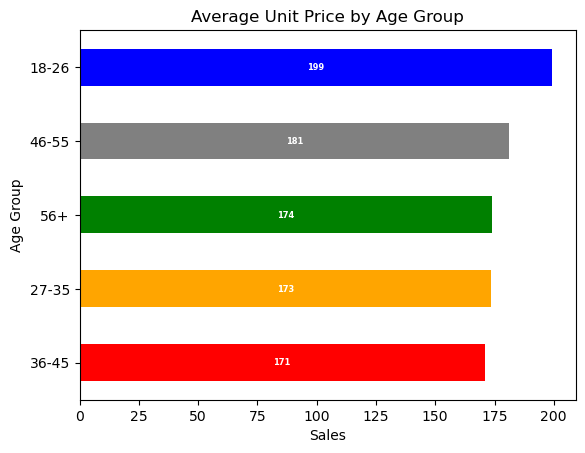

In [247]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Gender', 'Day of Week', 'Quarter', 'Month', 'Product Category', 'Total Amount'])
df1 = df.pivot_table(index='Age Group', aggfunc='mean', observed=True)
ax = df1.sort_values(by='Price per Unit', ascending=True).plot(kind='barh', stacked=False, y='Price per Unit', 
                                                             color=('red', 'orange', 'green', 'gray', 'blue'), legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Age Group')
plt.xlabel('Sales')
plt.title('Average Unit Price by Age Group')
show_dataLabel(ax, False)

The age group 18-26 on average purchases the most expensive items when compared to other age groups.

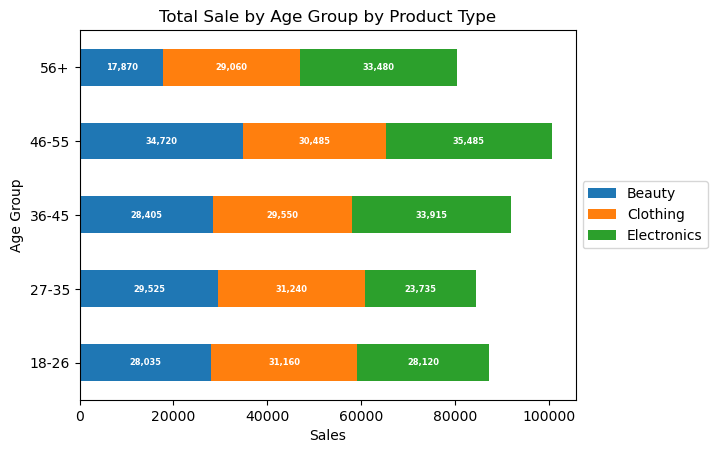

In [249]:
df = data.drop(columns=['Date', 'Age', 'Quantity', 'Gender', 'Day of Week', 'Quarter', 'Month'])
df1 = df.pivot_table(index='Age Group', columns='Product Category', aggfunc='sum', observed=True)
ax = df1.sort_values(by='Age Group', ascending=True).plot(kind='barh', stacked=True, y='Total Amount')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Age Group')
plt.xlabel('Sales')
plt.title('Total Sale by Age Group by Product Type')
show_dataLabel(ax, False)

Younger age groups (18-26) and (27-35) tend to spend more on clothing items. Older age groups tend to spend more on electronic products. 

### Main Highlights and Recommendation

This report analyzes a synthetic sales dataset. The dataset covers the sales data in the year 2023 starting from 1st Jan 2023 and ending in 1st Jan 2024.

#### Below is a summary of the main findings
* The total revenue for the period covered is $456,000.
* The total annual quantity sold is 2,514 items. 
* The average quantity sold per day is 2.51.

#### Main Insights
##### 1. Patterns by Customer Demographics
* Female customers generally contribute more to the total sale revenue than their male counterparts.
* Customers generally spend more on Electronics and Clothing than on Beauty products.
* By gender male customers show higher spending perference for eletronic products, while female customers spend more on their clothing.
* Age group 45-55 total purchases contribute more to annual sale revenue and age group 18-26 tend to make the most expersive purchases on average.
* Younger age groups (18-26) and (27-35) perfer to spend more on clothing items. While older age groups tend to make more purchases on electronic products.
* Age group (18-26) tend to make the most expensive purchases by price item and transaction value, indicating higher perference for premium-products. 

##### 2. Time Series Analysis
* Per month, total sale revenue hits its lowest point on September and achieve its highest peaks on the months of Feburuay, May and October.
* Saturday is the day with a greatest sales, while on Monday we observe sudden increase in sales as when compared to Sunday.
* Beauty products sell more on Monday and Friday. In contrast electronics and clothing products sell more on Saturday.

#### Recommendation
* Marketing campaigns for electronic products can focus more on male customers, while clothing marketing campigns can focus more on female customers.
* The company can make promotion for beauty products on Monday and Friday to boost sales.
* Promotion for electronic and clothing products can be made during the weekend on Saturday.
* Discounts can be offered during low sale periods (the month of Sep) to balance sale revenue accorss all periods.
* Electronic Product marketing can target older generations and while clothing products ads can target younger customers.
* Marketing campaigns for high-priced items can be tailored and personalized to connect with younger buyers (18-26 category).
* Ordering and inventory levels can be adjusted to account for lowest sales during the third quarter and in March.
* Stock up inventory during peak periods (Feb, May and Oct) to avoid stock ruptures.